## Explain-NNs 
Note on Explain-NNs integration: 
Explain-NNs is not an available pip-installable python package and cant directly wrap pytorch models inside jupyter notebook. to cover the explain nns explainability component of our project we implemented gradient based attribution (saliency, integrated gradient) using captum, which provides similar feature attribution insights. 

In [ ]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torchvision import models
import torch.nn as nn
import torchvision.transforms as T
from captum.attr import Saliency
import torch
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients
import os
print("Torch version:", torch.__version__)

Torch version: 2.9.1+cpu


## 1. Load trained model 
load fine-tuned ResNet18 classifier and set to evaluation mode. this model predicts one of the demographic classes from the BFW dataset.

In [ ]:
# 1. pfad zur gewichtsdatei 
model_path = r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\src\face_classifier_resnet18.pth"   # anpassen, falls nötig
# 2. anzahl klassen 
num_classes = 8
# 3 modellarchitektur nachbauen (wie im training)
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# 4. gewichte laden
state_dict = torch.load(model_path, map_location="cpu")
model.load_state_dict(state_dict)

# 5. evaluieren
model.eval()

print("rdy")

Model ready!!!!!!!!!


## 2. Load and preprocess input images
each selected image is converted to rgb and tranformed into a normalized pytorch tensor using the same preprocessing pipeline as during the training (resize - tensor - normalisation). ensures all attribution methods operate on valid model inputs. 

In [ ]:

transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

# Bild laden
img = Image.open(img_path).convert("RGB")
x = transform(img).unsqueeze(0)  # shape: 1x3x224x224

print("Tensor shape:", x.shape)

# ergebnis: 1 bild; 3 RGB farbkanäle, 224x224 bildgröße
# wir haben hier das bild in ein format umgewandelt, dass unser modell versteht. modell kann nämlich kein jpg-bild lesen, wir brauchen einen TENSOR yane zahlenmatrix.
# dafür brauche wir pfad zum bild (im_path)+ transformationsschritte.bild wird dann umgerechnet und in variable x gespeichert

Tensor shape: torch.Size([1, 3, 224, 224])


## 3. Feature Attribution using Saliency Maps 
Using Captum's Saliency method we compute the gradient of model output with respect to input pixels. For ca. 10 selected images ~10 selected images from different groups we calculate saliency maps and visualize the heatmaps. The results are saved in the folder figures/saliency

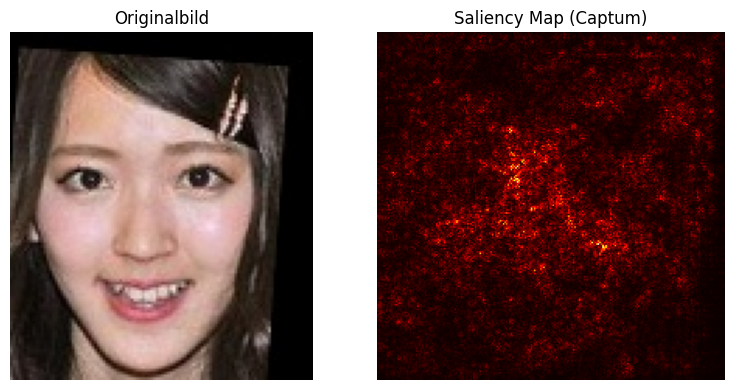

In [ ]:
# 1. asian female 
# 1. in pfad setzen
img_path = r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\data\bfw-cropped-aligned\asian_females\n000148\0269_01.jpg"

# 2. laen und transformieren
img = Image.open(img_path).convert("RGB")
x = transform(img).unsqueeze(0)

# 3. berechnung der vorhersage
model.eval()
with torch.no_grad():
    logits = model(x)
pred_class = logits.argmax(1).item()

# 4. captum saliency
from captum.attr import Saliency
saliency = Saliency(model)
attr = saliency.attribute(x, target=pred_class)

# 5. über farbkanäle zusammenfassen
attr = attr[0].detach().cpu()
attr = attr.abs().max(dim=0)[0].numpy()
attr = (attr - attr.min()) / (attr.max() - attr.min() + 1e-8)

# 6) plot
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Originalbild")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Saliency Map (Captum)")
plt.imshow(attr, cmap="hot")
plt.axis("off")

plt.tight_layout()
plt.savefig(
    r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\figures\saliency\saliency_asian_female_1.png",
    dpi=200,
    bbox_inches="tight")
plt.show()



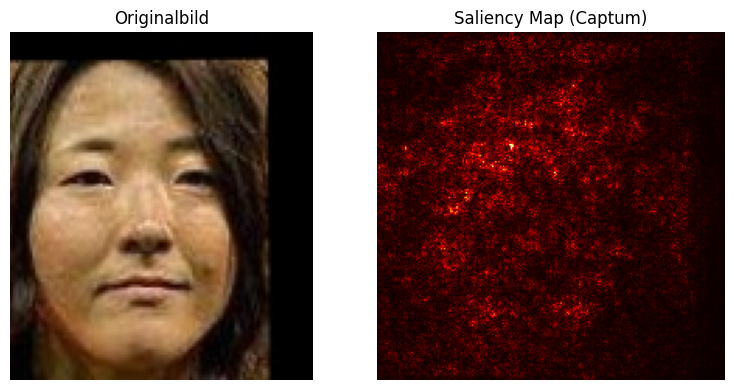

In [ ]:
# 2. asian female bild 

#1. 
img_path = r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\data\bfw-cropped-aligned\asian_females\n000838\0500_01.jpg"

#2. 
img = Image.open(img_path).convert("RGB")
x = transform(img).unsqueeze(0)

#3.
model.eval()
with torch.no_grad():
    logits = model(x)
pred_class = logits.argmax(1).item()

#4.
from captum.attr import Saliency
saliency = Saliency(model)
attr = saliency.attribute(x, target=pred_class)

#5.
attr = attr[0].detach().cpu()
attr = attr.abs().max(dim=0)[0].numpy()
attr = (attr - attr.min()) / (attr.max() - attr.min() + 1e-8)

#6.
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Originalbild")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Saliency Map (Captum)")
plt.imshow(attr, cmap="hot")
plt.axis("off")

plt.tight_layout()
plt.savefig(
    r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\figures\saliency\saliency_asian_female_2.png",
    dpi=200,
    bbox_inches="tight")
plt.show()


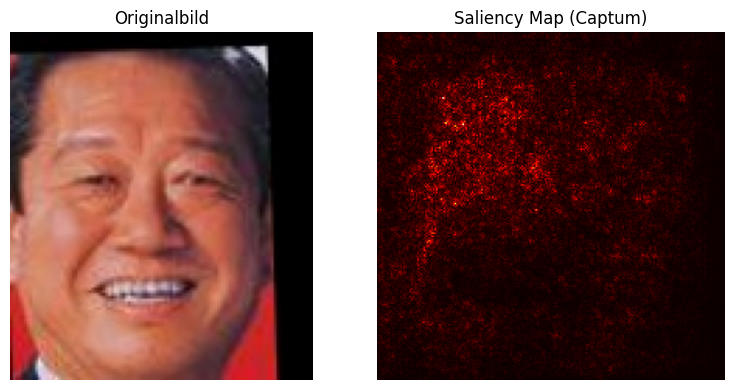

In [ ]:
# first asian male 

# 1)
img_path = r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\data\bfw-cropped-aligned\asian_males\n003533\0115_01.jpg"

# 2)
img = Image.open(img_path).convert("RGB")
x = transform(img).unsqueeze(0)

# 3)
model.eval()
with torch.no_grad():
    logits = model(x)
pred_class = logits.argmax(1).item()

# 4)
from captum.attr import Saliency
saliency = Saliency(model)
attr = saliency.attribute(x, target=pred_class)

# 5)
attr = attr[0].detach().cpu()
attr = attr.abs().max(dim=0)[0].numpy()
attr = (attr - attr.min()) / (attr.max() - attr.min() + 1e-8)

# 6)
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Originalbild")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Saliency Map (Captum)")
plt.imshow(attr, cmap="hot")
plt.axis("off")

plt.tight_layout()
plt.savefig(
    r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\figures\saliency\saliency_asian_male_1.png",
    dpi=200,
    bbox_inches="tight")
plt.show()


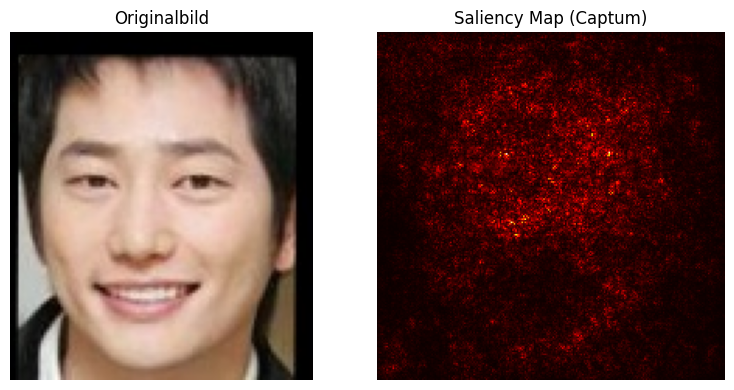

In [ ]:
# second asian male
# 1) Bildpfad setzen
img_path = r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\data\bfw-cropped-aligned\asian_males\n004809\0221_01.jpg"

# 2)
img = Image.open(img_path).convert("RGB")
x = transform(img).unsqueeze(0)

# 3)
model.eval()
with torch.no_grad():
    logits = model(x)
pred_class = logits.argmax(1).item()

# 4)
from captum.attr import Saliency
saliency = Saliency(model)
attr = saliency.attribute(x, target=pred_class)

# 5)
attr = attr[0].detach().cpu()
attr = attr.abs().max(dim=0)[0].numpy()
attr = (attr - attr.min()) / (attr.max() - attr.min() + 1e-8)

# 6)
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Originalbild")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Saliency Map (Captum)")
plt.imshow(attr, cmap="hot")
plt.axis("off")

plt.tight_layout()
plt.savefig(
    r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\figures\saliency\saliency_asian_male_2.png",
    dpi=200,
    bbox_inches="tight")
plt.show()


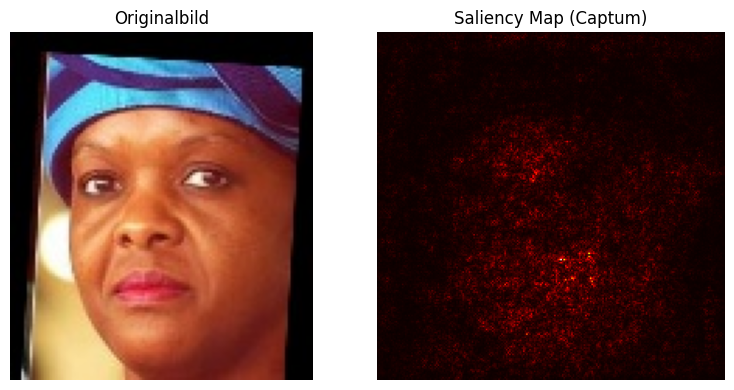

In [ ]:
# first black female
# 1)
img_path = r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\data\bfw-cropped-aligned\black_females\n003183\0662_02.jpg"

# 2)
img = Image.open(img_path).convert("RGB")
x = transform(img).unsqueeze(0)

# 3)
model.eval()
with torch.no_grad():
    logits = model(x)
pred_class = logits.argmax(1).item()

# 4)
from captum.attr import Saliency
saliency = Saliency(model)
attr = saliency.attribute(x, target=pred_class)

# 5)
attr = attr[0].detach().cpu()
attr = attr.abs().max(dim=0)[0].numpy()
attr = (attr - attr.min()) / (attr.max() - attr.min() + 1e-8)

# 6)
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Originalbild")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Saliency Map (Captum)")
plt.imshow(attr, cmap="hot")
plt.axis("off")

plt.tight_layout()
plt.savefig(
    r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\figures\saliency\saliency_black_female_1.png",
    dpi=200,
    bbox_inches="tight")
plt.show()


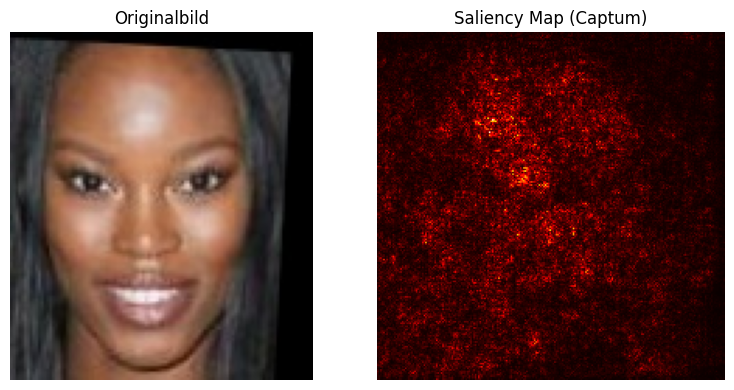

In [ ]:
# second black female 
# 1)
img_path = r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\data\bfw-cropped-aligned\black_females\n002638\0160_01.jpg"

# 2)
img = Image.open(img_path).convert("RGB")
x = transform(img).unsqueeze(0)

# 3)
model.eval()
with torch.no_grad():
    logits = model(x)
pred_class = logits.argmax(1).item()

# 4)
from captum.attr import Saliency
saliency = Saliency(model)
attr = saliency.attribute(x, target=pred_class)

# 5)
attr = attr[0].detach().cpu()
attr = attr.abs().max(dim=0)[0].numpy()
attr = (attr - attr.min()) / (attr.max() - attr.min() + 1e-8)

# 6)
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Originalbild")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Saliency Map (Captum)")
plt.imshow(attr, cmap="hot")
plt.axis("off")

plt.tight_layout()
plt.savefig(
    r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\figures\saliency\saliency_black_female_2.png",
    dpi=200,
    bbox_inches="tight")
plt.show()


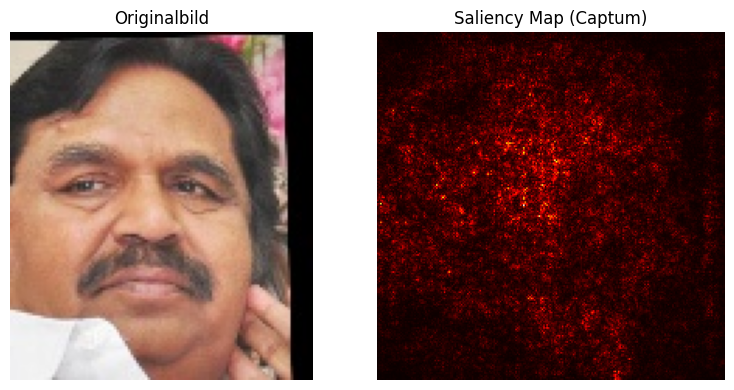

In [ ]:
# first indian male 
# 1)
img_path = r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\data\bfw-cropped-aligned\indian_males\n001998\0063_01.jpg"
# 2)
img = Image.open(img_path).convert("RGB")
x = transform(img).unsqueeze(0)

# 3)
model.eval()
with torch.no_grad():
    logits = model(x)
pred_class = logits.argmax(1).item()

# 4)
from captum.attr import Saliency
saliency = Saliency(model)
attr = saliency.attribute(x, target=pred_class)

# 5)
attr = attr[0].detach().cpu()
attr = attr.abs().max(dim=0)[0].numpy()
attr = (attr - attr.min()) / (attr.max() - attr.min() + 1e-8)

# 6)
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Originalbild")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Saliency Map (Captum)")
plt.imshow(attr, cmap="hot")
plt.axis("off")

plt.tight_layout()
plt.savefig(
    r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\figures\saliency\saliency_indian_male_1.png",
    dpi=200,
    bbox_inches="tight")
plt.show()




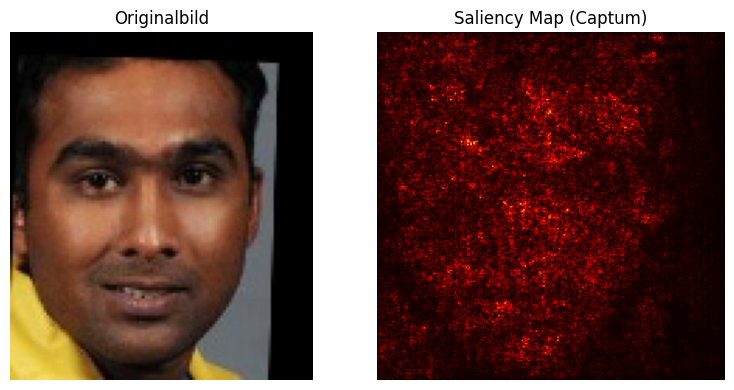

In [ ]:
#second indian male 
# 1)
img_path = r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\data\bfw-cropped-aligned\indian_males\n005429\0006_01.jpg"

# 2)
img = Image.open(img_path).convert("RGB")
x = transform(img).unsqueeze(0)

# 3)
model.eval()
with torch.no_grad():
    logits = model(x)
pred_class = logits.argmax(1).item()

# 4)
from captum.attr import Saliency
saliency = Saliency(model)
attr = saliency.attribute(x, target=pred_class)

# 5)
attr = attr[0].detach().cpu()
attr = attr.abs().max(dim=0)[0].numpy()
attr = (attr - attr.min()) / (attr.max() - attr.min() + 1e-8)

# 6)
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Originalbild")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Saliency Map (Captum)")
plt.imshow(attr, cmap="hot")
plt.axis("off")

plt.tight_layout()
plt.savefig(
    r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\figures\saliency\saliency_indian_male_2.png",
    dpi=200,
    bbox_inches="tight")
plt.show()

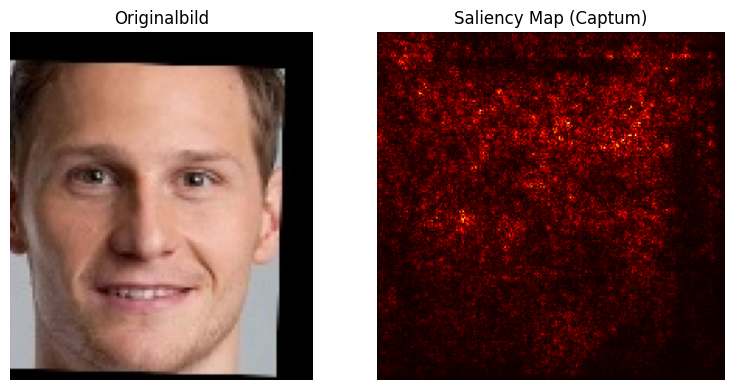

In [ ]:
# first white male 
# 1)
img_path = r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\data\bfw-cropped-aligned\white_males\n000957\0474_01.jpg"

# 2)
img = Image.open(img_path).convert("RGB")
x = transform(img).unsqueeze(0)

# 3)
model.eval()
with torch.no_grad():
    logits = model(x)
pred_class = logits.argmax(1).item()

# 4)
from captum.attr import Saliency
saliency = Saliency(model)
attr = saliency.attribute(x, target=pred_class)

# 5)
attr = attr[0].detach().cpu()
attr = attr.abs().max(dim=0)[0].numpy()
attr = (attr - attr.min()) / (attr.max() - attr.min() + 1e-8)

# 6)
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Originalbild")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Saliency Map (Captum)")
plt.imshow(attr, cmap="hot")
plt.axis("off")

plt.tight_layout()
plt.savefig(
    r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\figures\saliency\saliency_white_male_1.png",
    dpi=200,
    bbox_inches="tight")
plt.show()


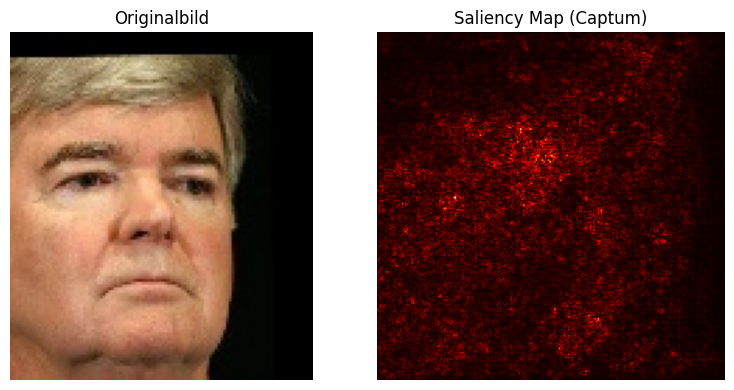

In [ ]:
# second white male 
# 1)
img_path = r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\data\bfw-cropped-aligned\white_males\n005685\0073_01.jpg"

# 2)
img = Image.open(img_path).convert("RGB")
x = transform(img).unsqueeze(0)

# 3)
model.eval()
with torch.no_grad():
    logits = model(x)
pred_class = logits.argmax(1).item()

# 4)
from captum.attr import Saliency
saliency = Saliency(model)
attr = saliency.attribute(x, target=pred_class)

# 5)
attr = attr[0].detach().cpu()
attr = attr.abs().max(dim=0)[0].numpy()
attr = (attr - attr.min()) / (attr.max() - attr.min() + 1e-8)

# 6)
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Originalbild")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Saliency Map (Captum)")
plt.imshow(attr, cmap="hot")
plt.axis("off")

plt.tight_layout()
plt.savefig(
    r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\figures\saliency\saliency_white_male_2.png",
    dpi=200,
    bbox_inches="tight")
plt.show()


## Automated Integrated Gradients pipeline 

Batch script was created to iterate over all chosen images, compute integrated gradients & plt the original image alongside its ig heatmap + save the results to figures/integrated_gradients/

In [ ]:
# Speicherordner
save_dir_ig = r"C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\figures\integrated_gradients"
os.makedirs(save_dir_ig, exist_ok=True)

model.eval()
ig = IntegratedGradients(model)

for idx, img_path in enumerate(image_paths_ig):
    print(f"Bearbeite Bild {idx+1}: {img_path}")

    # 1) Bild laden
    img = Image.open(img_path).convert("RGB")
    x = transform(img).unsqueeze(0)

    # 2) Vorhersage
    with torch.no_grad():
        logits = model(x)
    pred_class = logits.argmax(1).item()

    # 3) Integrated Gradients
    baseline = torch.zeros_like(x)              # schwarzes Baseline-Bild
    attr_ig = ig.attribute(x, baselines=baseline, target=pred_class)  # [1, 3, 224, 224]

    # 4) 2D-Heatmap
    attr = attr_ig[0].detach().cpu()           # [3, 224, 224]
    attr = attr.abs().max(dim=0)[0].numpy()    # [224, 224]
    attr = (attr - attr.min()) / (attr.max() - attr.min() + 1e-8)

    # 5) Plot
    fig = plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.title("Originalbild")
    plt.imshow(img)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title("Integrated Gradients")
    plt.imshow(attr, cmap="hot")
    plt.axis("off")

    plt.tight_layout()

    # 6) Speichern
    filename = f"ig_{idx+1}.png"   # z.B. ig_1.png, ig_2.png, ...
    save_path = os.path.join(save_dir_ig, filename)
    fig.savefig(save_path, dpi=200, bbox_inches="tight")
    plt.close(fig)

    print(f"   ✔ gespeichert unter: {save_path}")

Bearbeite Bild 1: C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\data\bfw-cropped-aligned\asian_females\n000148\0269_01.jpg
   ✔ gespeichert unter: C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\figures\integrated_gradients\ig_1.png
Bearbeite Bild 2: C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\data\bfw-cropped-aligned\asian_females\n000838\0500_01.jpg
   ✔ gespeichert unter: C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\figures\integrated_gradients\ig_2.png
Bearbeite Bild 3: C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\data\bfw-cropped-aligned\asian_males\n003533\0115_01.jpg
   ✔ gespeichert unter: C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\figures\integrated_gradients\ig_3.png
Bearbeite Bild 4: C:\Users\SinaElBasiouni\Documents\3. Semester\Deep Learning\tutorial-new-grp5\data\bfw-cropped-alig